# HR analytics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('aug_train.csv')
df_test = pd.read_csv('aug_test.csv')

In [3]:
df_train.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# Data analyses and visualization

In [5]:
df1 = df_train.fillna("Unknown")
df1.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

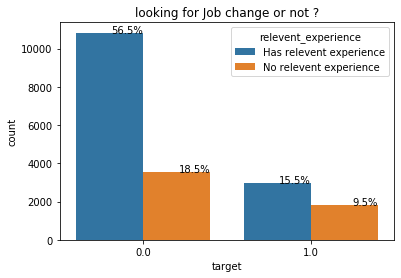

In [6]:
ax = sns.countplot(df1['target'],hue=df1['relevent_experience'])
plt.title("looking for Job change or not ?")
total =float(len(df1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')

0 – Not looking for job change<br>
1 – Looking for a job change<br>
<br>
15.5% have relevent experience and looks for job change 


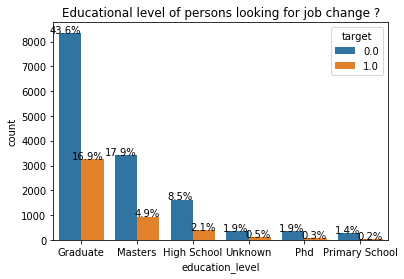

In [7]:
ax = sns.countplot(df1['education_level'],hue=df1['target'])
plt.title("Educational level of persons looking for job change ?")
total =float(len(df1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')

43% of Graduate looking for job change and it is highest percentage

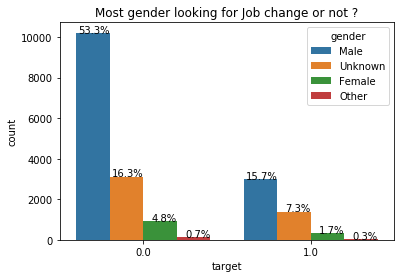

In [8]:
ax = sns.countplot(df1['target'],hue=df1['gender'])
plt.title("Most gender looking for Job change or not ?")
total =float(len(df1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')

-24.7% people are lookging for a job change<br>
-15.7% people are male

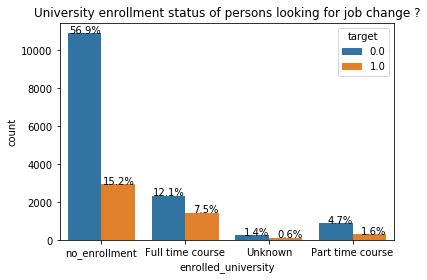

In [9]:
ax = sns.countplot(df1['enrolled_university'],hue=df1['target'])
plt.title("University enrollment status of persons looking for job change ?")
total =float(len(df1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')

23% looks forjob change and the highest percentage is no enrollment  

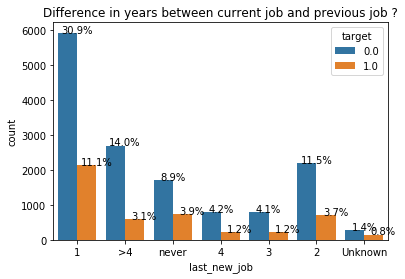

In [10]:
ax = sns.countplot(df1['last_new_job'],hue=df1['target'])
plt.title("Difference in years between current job and previous job ?")
total =float(len(df1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

Around 11.1 % of the people who are looking out for job change have only one year of difference between their current job and previus job

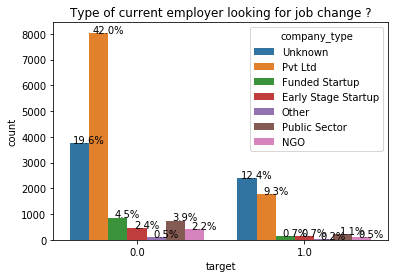

In [11]:
ax = sns.countplot(df1['target'],hue=df1['company_type'])
plt.title("Type of current employer looking for job change ?")
total =float(len(df1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

the most Type of current employer looking for job change is pvt by 9.3%

Text(0.5, 0, 'looking for job change')

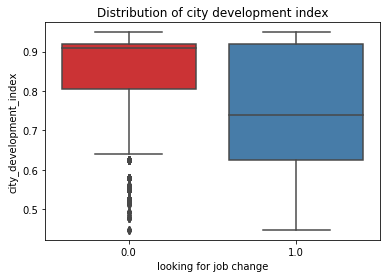

In [12]:
sns.boxplot(x="target",y="city_development_index",data=df1,palette="Set1")
plt.title("Distribution of city development index")
plt.xlabel("looking for job change")

Average city development index for people who are looking for job change is less. So, people from city which has higher development index are less likely to look for job change

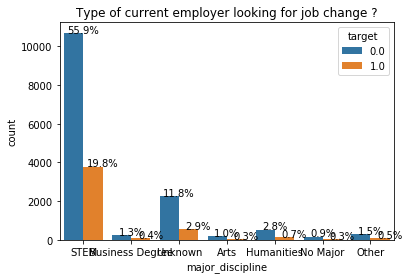

In [13]:
ax = sns.countplot(df1['major_discipline'],hue=df1['target'])
plt.title("Type of current employer looking for job change ?")
total =float(len(df1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

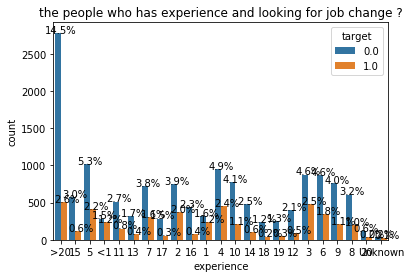

In [14]:
ax = sns.countplot(df1['experience'],hue=df1['target'])
plt.title("the people who has experience and looking for job change ?")
total =float(len(df1))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

2.6% of people who has experience >20 looking for job change 

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [16]:
df_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [17]:
df_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [18]:
df_train['city'] = df_train['city'].apply(lambda x:x.split('_')[1])


In [19]:
df_train['city'] = df_train['city'].map(lambda x: x.lstrip('city_'))
df_train.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [20]:
df_train = df_train.drop(columns = ['enrollee_id'] , axis=1)
df_train.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [21]:
df_train['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [22]:
df_train['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [23]:
df_train['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [24]:
df_train['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [25]:
df_train['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [26]:
df_train['relevent_experience'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [27]:
df_train['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [28]:
df_train['company_type'].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [29]:
gender_ctg = {
        'Male': 2,
        'Female': 1,
        'Other': 0
         }

company_size_cat = {
    '<10'          :    0,
    '10/49'        :    1, 
    '100-500'      :    2, 
    '1000-4999'    :    3, 
    '10000+'       :    4, 
    '50-99'        :    5, 
    '500-999'      :    6, 
    '5000-9999'    :    7
}

experience_cat = {
    '<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21
} 

education_level_cat = {
    'Primary School' :    0,
    'Graduate'       :    2,
    'Masters'        :    3, 
    'High School'    :    1, 
    'Phd'            :    4
    } 

major_cat ={ 
    'STEM'                   :    0,
    'Business Degree'        :    1, 
    'Arts'                   :    2, 
    'Humanities'             :    3, 
    'No Major'               :    4, 
    'Other'                  :    5 
}

relevent_experience_cat = {
    'Has relevent experience':  1,
    'No relevent experience':    0
}

enrolled_university_cat = {
    'no_enrollment'   :    0,
    'Full time course':    1, 
    'Part time course':    2 
}

company_type_cat = {
    'Pvt Ltd'               :    0,
    'Funded Startup'        :    1, 
    'Early Stage Startup'   :    2, 
    'Other'                 :    3, 
    'Public Sector'         :    4, 
    'NGO'                   :    5
}

last_new_job_cat = {
    'never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

In [30]:
df_train.loc[:,'company_size'] = df_train['company_size'].map(company_size_cat)
df_train.loc[:,'experience'] = df_train['experience'].map(experience_cat)
df_train.loc[:,'education_level'] = df_train['education_level'].map(education_level_cat)
df_train.loc[:,'major_discipline'] = df_train['major_discipline'].map(major_cat)
df_train.loc[:,'relevent_experience'] = df_train['relevent_experience'].map(relevent_experience_cat)
df_train.loc[:,'enrolled_university'] = df_train['enrolled_university'].map(enrolled_university_cat)
df_train.loc[:,'company_type'] = df_train['company_type'].map(company_type_cat)
df_train.loc[:,'last_new_job'] = df_train['last_new_job'].map(last_new_job_cat)
df_train.loc[:,'gender'] = df_train['gender'].map(gender_ctg)

In [31]:
df_train

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,103,0.920,2.0,1,0.0,2.0,0.0,21.0,NaN,NaN,1.0,36,1.0
1,40,0.776,2.0,0,0.0,2.0,0.0,15.0,5.0,0.0,5.0,47,0.0
2,21,0.624,NaN,0,1.0,2.0,0.0,5.0,NaN,NaN,0.0,83,0.0
3,115,0.789,NaN,0,NaN,2.0,1.0,0.0,NaN,0.0,0.0,52,1.0
4,162,0.767,2.0,1,0.0,3.0,0.0,21.0,5.0,1.0,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,173,0.878,2.0,0,0.0,2.0,3.0,14.0,NaN,NaN,1.0,42,1.0
19154,103,0.920,2.0,1,0.0,2.0,0.0,14.0,NaN,NaN,4.0,52,1.0
19155,103,0.920,2.0,1,0.0,2.0,0.0,21.0,5.0,0.0,4.0,44,0.0
19156,65,0.802,2.0,1,0.0,1.0,NaN,0.0,6.0,0.0,2.0,97,0.0


In [32]:
df_train.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [33]:
df_train['gender'].fillna(df_train['gender'].mode()[0], inplace=True)
df_train['enrolled_university'].fillna(df_train['enrolled_university'].mode()[0], inplace=True)
df_train['education_level'].fillna(df_train['education_level'].mode()[0], inplace=True)
df_train['major_discipline'].fillna(df_train['major_discipline'].mode()[0], inplace=True)
df_train['experience'] = df_train['experience'].fillna((df_train['experience'].median()))
df_train['company_size'] = df_train['company_size'].fillna((df_train['company_size'].median()))
df_train['company_type'] = df_train['company_type'].fillna((df_train['company_type'].median()))
df_train['last_new_job'] = df_train['last_new_job'].fillna((df_train['last_new_job'].median()))


In [34]:
df_train.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [35]:
df_train.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,103,0.920,2.0,1,0.0,2.0,0.0,21.0,3.0,0.0,1.0,36,1.0
1,40,0.776,2.0,0,0.0,2.0,0.0,15.0,5.0,0.0,5.0,47,0.0
2,21,0.624,2.0,0,1.0,2.0,0.0,5.0,3.0,0.0,0.0,83,0.0
3,115,0.789,2.0,0,0.0,2.0,1.0,0.0,3.0,0.0,0.0,52,1.0
4,162,0.767,2.0,1,0.0,3.0,0.0,21.0,5.0,1.0,4.0,8,0.0
5,176,0.764,2.0,1,2.0,2.0,0.0,11.0,3.0,0.0,1.0,24,1.0
6,160,0.920,2.0,1,0.0,1.0,0.0,5.0,5.0,1.0,1.0,24,0.0
7,46,0.762,2.0,1,0.0,2.0,0.0,13.0,0.0,0.0,5.0,18,1.0
8,103,0.920,2.0,1,0.0,2.0,0.0,7.0,5.0,0.0,1.0,46,1.0
9,103,0.920,2.0,1,0.0,2.0,0.0,17.0,4.0,0.0,5.0,123,0.0


In [36]:
df_test.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
5,217,city_23,0.899,Male,No relevent experience,Part time course,Masters,STEM,10,NaN,NaN,2,12
6,21465,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,<1,100-500,Pvt Ltd,1,11
7,27302,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,>4,81
8,12994,city_173,0.878,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,2
9,16287,city_21,0.624,Male,Has relevent experience,Full time course,Graduate,NaN,3,50-99,Funded Startup,1,4


In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [38]:
df_test.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


In [39]:
df_test['city'] = df_test['city'].map(lambda x: x.lstrip('city_'))

In [40]:
df_test = df_test.drop(columns = ['enrollee_id'] , axis=1)

In [41]:
df_test.isnull().sum()

city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [42]:
df_test['experience'].value_counts()

>20    383
5      163
3      154
4      145
6      130
2      128
7      116
9      113
10      96
11      86
8       82
<1      74
16      68
15      59
1       56
14      55
13      54
12      52
17      36
19      29
18      26
20      19
Name: experience, dtype: int64

In [43]:
relevent_experience_cat = {
    'Has relevent experience':  1,
    'No relevent experience':    0
}

enrolled_university_cat = {
    'no_enrollment'   :  0,
    'Full time course':    1, 
    'Part time course':    2 
}
    
education_level_cat = {
    'Primary School' :    0,
    'Graduate'       :    2,
    'Masters'        :    3, 
    'High School'    :    1, 
    'Phd'            :    4
    } 
    
major_cat ={ 
    'STEM'                   :    0,
    'Business Degree'        :    1, 
    'Arts'                   :    2, 
    'Humanities'             :    3, 
    'No Major'               :    4, 
    'Other'                  :    5 
}
    
experience_cat = {
    '<1'      :    0,
    '1'       :    1, 
    '2'       :    2, 
    '3'       :    3, 
    '4'       :    4, 
    '5'       :    5,
    '6'       :    6,
    '7'       :    7,
    '8'       :    8, 
    '9'       :    9, 
    '10'      :    10, 
    '11'      :    11,
    '12'      :    12,
    '13'      :    13, 
    '14'      :    14, 
    '15'      :    15, 
    '16'      :    16,
    '17'      :    17,
    '18'      :    18,
    '19'      :    19, 
    '20'      :    20, 
    '>20'     :    21
} 
    
company_type_cat = {
    'Pvt Ltd'               :    0,
    'Funded Startup'        :    1, 
    'Early Stage Startup'   :    2, 
    'Other'                 :    3, 
    'Public Sector'         :    4, 
    'NGO'                   :    5
}

company_size_cat = {
    '<10'          :    0,
    '10/49'        :    1, 
    '100-500'      :    2, 
    '1000-4999'    :    3, 
    '10000+'       :    4, 
    '50-99'        :    5, 
    '500-999'      :    6, 
    '5000-9999'    :    7
}
    
last_new_job_cat = {
    'never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

In [44]:
df_test.loc[:,'education_level'] = df_test['education_level'].map(education_level_cat)
df_test.loc[:,'company_size'] = df_test['company_size'].map(company_size_cat)
df_test.loc[:,'company_type'] = df_test['company_type'].map(company_type_cat)
df_test.loc[:,'last_new_job'] = df_test['last_new_job'].map(last_new_job_cat)
df_test.loc[:,'major_discipline'] = df_test['major_discipline'].map(major_cat)
df_test.loc[:,'enrolled_university'] = df_test['enrolled_university'].map(enrolled_university_cat)
df_test.loc[:,'relevent_experience'] = df_test['relevent_experience'].map(relevent_experience_cat)
df_test.loc[:,'experience'] = df_test['experience'].map(experience_cat)

In [45]:
df_test.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,41,0.827,Male,1,1.0,2.0,0.0,9.0,0.0,NaN,1.0,21
1,103,0.920,Female,1,0.0,2.0,0.0,5.0,NaN,0.0,1.0,98
2,21,0.624,Male,0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,15
3,13,0.827,Male,1,0.0,3.0,0.0,11.0,1.0,0.0,1.0,39
4,103,0.920,Male,1,0.0,2.0,0.0,21.0,4.0,0.0,5.0,72
5,23,0.899,Male,0,2.0,3.0,0.0,10.0,NaN,NaN,2.0,12
6,21,0.624,NaN,1,0.0,2.0,0.0,0.0,2.0,0.0,1.0,11
7,160,0.920,Female,1,0.0,2.0,0.0,21.0,NaN,NaN,5.0,81
8,173,0.878,Male,1,0.0,2.0,0.0,14.0,NaN,NaN,4.0,2
9,21,0.624,Male,1,1.0,2.0,NaN,3.0,5.0,1.0,1.0,4


In [46]:
df_test['gender'].fillna(df_test['gender'].mode()[0], inplace=True)
df_test['enrolled_university'].fillna(df_test['enrolled_university'].mode()[0], inplace=True)
df_test['education_level'].fillna(df_test['education_level'].mode()[0], inplace=True)
df_test['major_discipline'].fillna(df_test['major_discipline'].mode()[0], inplace=True)
df_test['experience'] = df_test['experience'].fillna((df_test['experience'].median()))
df_test['company_size'] = df_test['company_size'].fillna((df_test['company_size'].median()))
df_test['company_type'] = df_test['company_type'].fillna((df_test['company_type'].median()))
df_test['last_new_job'] = df_test['last_new_job'].fillna((df_test['last_new_job'].median()))

In [47]:
df_test.head(10)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,41,0.827,Male,1,1.0,2.0,0.0,9.0,0.0,0.0,1.0,21
1,103,0.920,Female,1,0.0,2.0,0.0,5.0,3.0,0.0,1.0,98
2,21,0.624,Male,0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,15
3,13,0.827,Male,1,0.0,3.0,0.0,11.0,1.0,0.0,1.0,39
4,103,0.920,Male,1,0.0,2.0,0.0,21.0,4.0,0.0,5.0,72
5,23,0.899,Male,0,2.0,3.0,0.0,10.0,3.0,0.0,2.0,12
6,21,0.624,Male,1,0.0,2.0,0.0,0.0,2.0,0.0,1.0,11
7,160,0.920,Female,1,0.0,2.0,0.0,21.0,3.0,0.0,5.0,81
8,173,0.878,Male,1,0.0,2.0,0.0,14.0,3.0,0.0,4.0,2
9,21,0.624,Male,1,1.0,2.0,0.0,3.0,5.0,1.0,1.0,4


# Model

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [49]:
X = df_train.dropna().drop(columns=['target']).values
y = df_train.dropna()['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

In [50]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
rfc_prediction = rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test, rfc_prediction)
rfc_df = pd.DataFrame(data=[accuracy_score(y_test, rfc_prediction), recall_score(y_test, rfc_prediction),
                   precision_score(y_test, rfc_prediction), roc_auc_score(y_test, rfc_prediction)], 
             columns=['Random Forest Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])

In [51]:
print(confusion_matrix(y_test, rfc_prediction))
print(accuracy_score(y_test, rfc_prediction))
print(recall_score(y_test, rfc_prediction))
print(precision_score(y_test, rfc_prediction))
print(roc_auc_score(y_test, rfc_prediction))

[[3782  496]
 [ 845  625]]
0.7667014613778705
0.42517006802721086
0.5575379125780553
0.6546140195208519


In [52]:
print(classification_report(y_test, rfc_prediction))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      4278
         1.0       0.56      0.43      0.48      1470

    accuracy                           0.77      5748
   macro avg       0.69      0.65      0.67      5748
weighted avg       0.75      0.77      0.76      5748



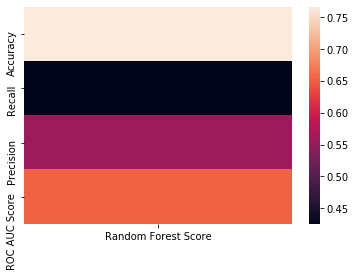

In [53]:
sns.heatmap(rfc_df)

In [54]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
knn_prediction = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, knn_prediction)
knn_df = pd.DataFrame(data=[accuracy_score(y_test, knn_prediction), recall_score(y_test, knn_prediction),
                   precision_score(y_test, knn_prediction), roc_auc_score(y_test, knn_prediction)], 
             columns=['KNN Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])

In [55]:
print(confusion_matrix(y_test, knn_prediction))
print(accuracy_score(y_test, knn_prediction))
print(recall_score(y_test, knn_prediction))
print(precision_score(y_test, knn_prediction))
print(roc_auc_score(y_test, knn_prediction))

[[3944  334]
 [1115  355]]
0.7479123173277662
0.24149659863945577
0.5152394775036284
0.5817113661733978


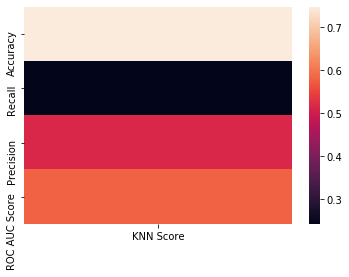

In [56]:
sns.heatmap(knn_df) 

In [57]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_prediction = dtree.predict(X_test)
cm_dtree = confusion_matrix(y_test, dtree_prediction)
dtree_df = pd.DataFrame(data=[accuracy_score(y_test, dtree_prediction), recall_score(y_test, dtree_prediction),
                   precision_score(y_test, dtree_prediction), roc_auc_score(y_test, dtree_prediction)], 
             columns=['Decision Tree Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])

In [58]:
print(confusion_matrix(y_test, dtree_prediction))
print(accuracy_score(y_test, dtree_prediction))
print(recall_score(y_test, dtree_prediction))
print(precision_score(y_test, dtree_prediction))
print(roc_auc_score(y_test, dtree_prediction))

[[3427  851]
 [ 813  657]]
0.7105080027835768
0.44693877551020406
0.43567639257294427
0.6240070221637041


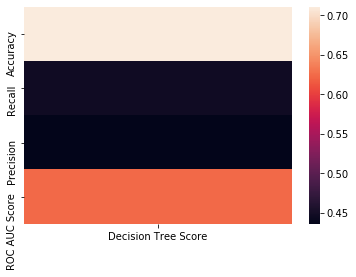

In [59]:
sns.heatmap(dtree_df) 

In [60]:
# Support Vector Machine (SVM / SVC)
pipeline = make_pipeline(StandardScaler(), SVC(kernel='sigmoid'))
pipeline.fit(X_train, y_train)
svc_prediction = pipeline.predict(X_test)
cm_svc = confusion_matrix(y_test, svc_prediction)
svc_df = pd.DataFrame(data=[accuracy_score(y_test, svc_prediction), recall_score(y_test, svc_prediction),
                   precision_score(y_test, svc_prediction), roc_auc_score(y_test, svc_prediction)], 
             columns=['SVC Score'],
             index=["Accuracy", "Recall", "Precision", "ROC AUC Score"])

In [61]:
print(confusion_matrix(y_test, svc_prediction))
print(accuracy_score(y_test, svc_prediction))
print(recall_score(y_test, svc_prediction))
print(precision_score(y_test, svc_prediction))
print(roc_auc_score(y_test, svc_prediction))

[[3363  915]
 [1043  427]]
0.6593597773138483
0.2904761904761905
0.3181818181818182
0.5382955987444067


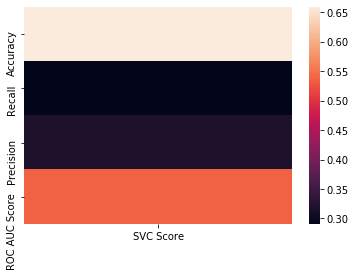

In [62]:
sns.heatmap(svc_df) 